<img 
     src="https://github.com/Kesterchia/Institute-of-Data/raw/master/Mini%20Project%201%20(EDA)/Global%20animal%20diseases%20dataset/Data/kruger_wildlife__banner.jpg" 
     alt="Drawing" 
     style="width: 600px;"/>

## About the dataset:

## Context
This dataset is downloaded from the EMPRES Global Animal Disease Information System.
The Empress-i system is run by the Food and Agriculture Organisation of the United Nations. Its Disease Outbreak Module provides updated information on global animal disease distribution and current threats at national, regional and global level on priority animal diseases. Disease data, such as information on suspicions and confirmation of outbreaks in livestock and wildlife species, laboratory results or follow-up reports on an outbreak situation, can be stored in a standardized format and are presented through a user-friendly and customizable interface. 

## Content
The dataset shows the when, where and what of animal disease outbreaks from 2016 to 2017, including African swine fever, Foot and mouth disease and Bird-flu. Numbers of cases, deaths, etc are also included.




# Part 1: Getting a brief overview of the data

In [1]:
# Import modules 

import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

In [24]:
#Read in disease data on cat adoptions as df

df = pd.read_csv(".\Data\Outbreak_240817.csv")

In [20]:
# Quickly seeing some information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008 entries, 0 to 17007
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17008 non-null  int64  
 1   source              17008 non-null  object 
 2   latitude            17008 non-null  float64
 3   longitude           17008 non-null  float64
 4   region              17008 non-null  object 
 5   country             17008 non-null  object 
 6   admin1              17008 non-null  object 
 7   localityName        17008 non-null  object 
 8   localityQuality     17008 non-null  object 
 9   observationDate     16506 non-null  object 
 10  reportingDate       17008 non-null  object 
 11  status              17008 non-null  object 
 12  disease             17008 non-null  object 
 13  serotypes           10067 non-null  object 
 14  speciesDescription  15360 non-null  object 
 15  sumAtRisk           9757 non-null   float64
 16  sumC

In [4]:
#Generating profile report for df

pandas_profiling.ProfileReport(df)

## Observations:


Human-related variables like deaths, age and affected individuals have over 90% of values missing. This could be due to difficulty getting information on whether diseases have affected the human population

The data seems clean in other columns with geographical data and disease types.





# Part 2: Doing some EDA to find information from the dataset

## Looking at the most common diseases:

In [5]:
#Find top 5 most common diseases
top5_diseases = df[['disease']].groupby(df['disease']).count().nlargest(7,'disease')
top5_diseases

disease
disease                        
Influenza - Avian          6479
Bluetongue                 3391
African swine fever        3330
Lumpy skin disease         2112
MERS-CoV                    675
Foot and mouth disease      303
Newcastle disease           185

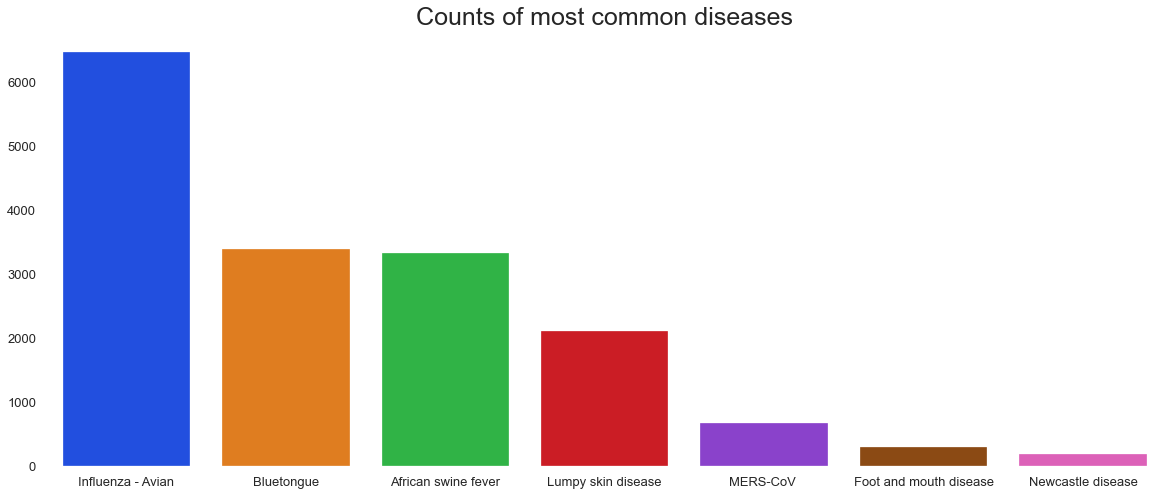

In [16]:
#Plot the counts of diseases

fig = plt.figure(figsize = (20,8))

disease_plot = sns.countplot(df[df['disease'].isin(list(top5_diseases.index))]['disease'],
                             palette = 'bright',
                             order = top5_diseases.index)
disease_plot.tick_params(labelsize=13)

plt.title('Counts of most common diseases',fontdict = {'fontsize':25})
plt.xlabel(None)
plt.ylabel(None)
plt.show()

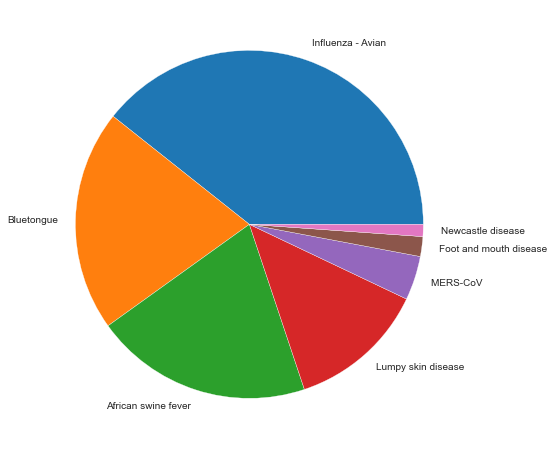

In [36]:
# Pie chart version of the above plot

plt.figure(figsize = (20,8))
pieplot = plt.pie(x = top5_diseases['disease'],
       labels = list(top5_diseases.index))
plt.show()

### Observation: 

The 4 most common diseases seem much more prevalent than the others.

## Looking at which species are most affected by diseases worldwide:

In [7]:
# Looking for most common species affected by diseases

np.count_nonzero(df['speciesDescription'].unique())
top8_species = df['speciesDescription'].groupby(df['speciesDescription']).count().nlargest(8)
top8_species

speciesDescription
domestic, cattle                 4913
wild, wild boar                  2670
domestic, chicken                1682
domestic, duck                   1227
domestic, unspecified bird        808
domestic, sheep                   684
domestic, swine                   675
wild,mute swan (cygnus olor))     311
Name: speciesDescription, dtype: int64

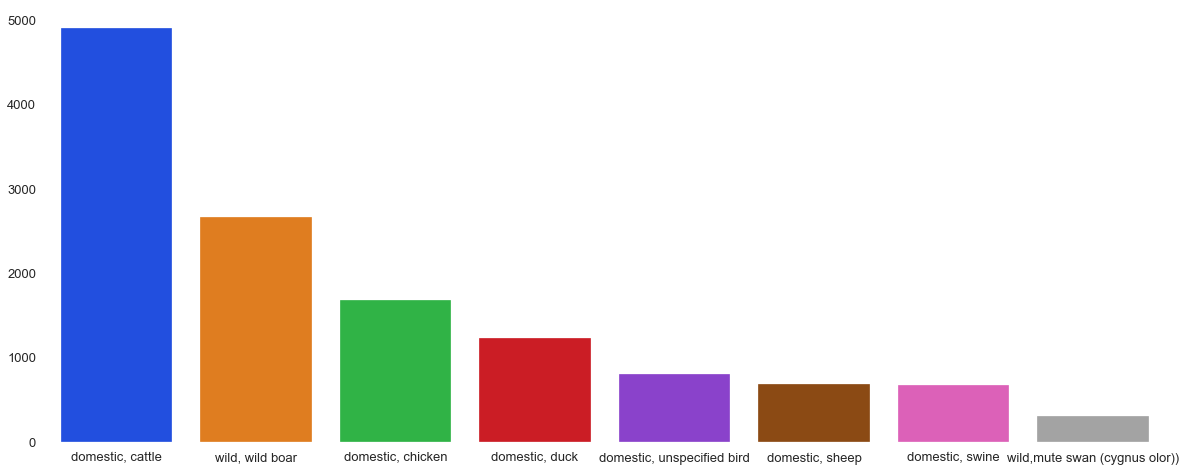

In [8]:
#Plot these species
fig = plt.figure(figsize = (20,8))
species_plot = sns.countplot(df[df['speciesDescription'].isin(top8_species.index)]['speciesDescription'],
                             order = top8_species.index,
                             palette = 'bright')
species_plot.tick_params(labelsize = 13)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

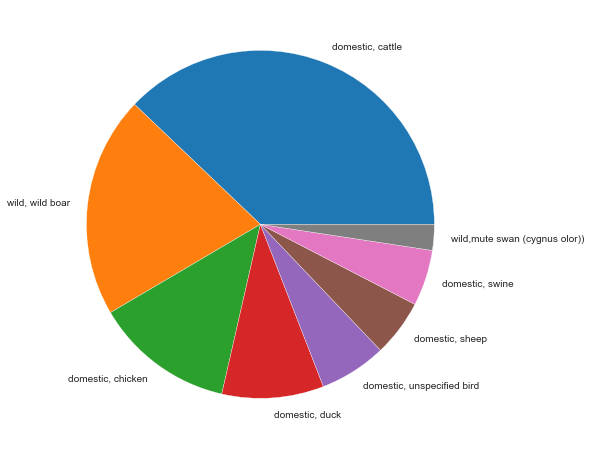

In [35]:
#Pie chart version of the above plot

plt.figure(figsize = (20,8))
pieplot = plt.pie(x = top8_species,
       labels = list(top8_species.index))
plt.show()

### Observation: 
Domestic cattle are by far the most common species with diseases. 

It is also interesting that the top 7 disease-affected species are all domestic except for wild boar, which are the second most affected species.

## Looking at the age distribution of humans affected by zoonotic diseases:

In [9]:
#Get values on age of humans affected by disease
age_info = df[df['humansAge'].notnull()][['humansAge']]

#Dropping values of age = 0
age_info_clean = age_info[age_info['humansAge'] != 0]

age_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362 entries, 83 to 16881
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   humansAge  362 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


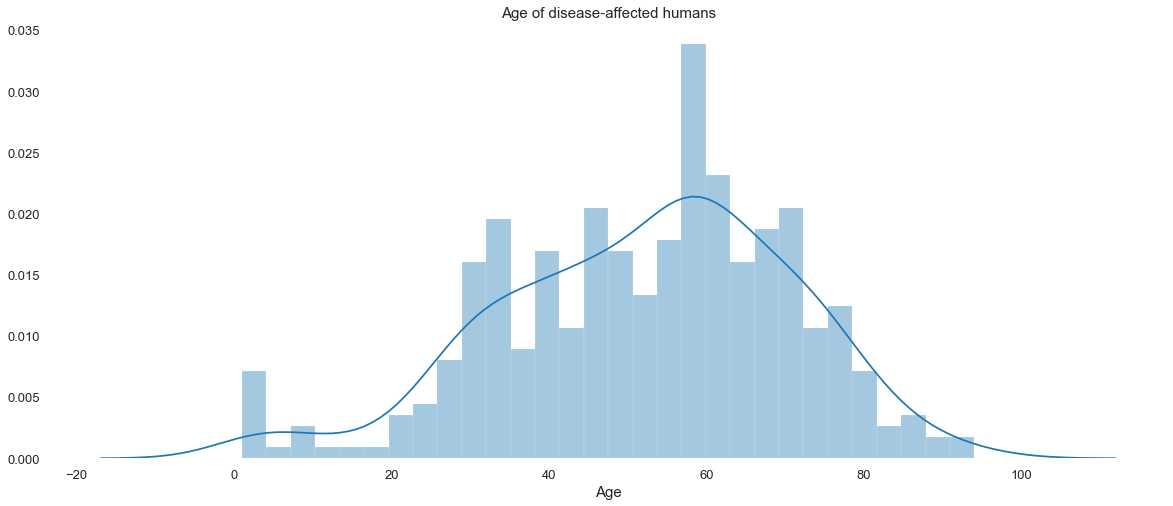

In [10]:
fig = plt.figure(figsize = (20,8))
age_plot = sns.distplot(age_info_clean, bins = 30)
age_plot.tick_params(labelsize = 13)

plt.xlabel('Age', fontdict = {'fontsize':15})
plt.title('Age of disease-affected humans', fontdict = {'fontsize':15})
plt.show()

### Observation: 
The age distribution seems relatively normal with the mean age at around 60. There is also a slight spike in cases in infants at the left end of the graph.

It seems like the very young are more susceptible to zoonotic diseases.

## Using Folium's heatmap to see which regions are most affected by diseases

In [12]:
#Creating a list of location information (Latitudes and Longitudes)

lats = df['latitude'].astype(float)
long = df['longitude'].astype(float)
locationlist = []
for i in range(0,len(lats)):
    e = [lats[i],long[i]]
    locationlist.append(e)

#Location list should be a list of lists:

locationlist[0:5]

[[-27.9, 30.8],
 [54.837037, 73.354155],
 [-21.07774, 30.21162],
 [-26.0, 28.3],
 [49.2379, 17.7002]]

In [13]:
#Importing folium and the HeatMap function

import folium
from folium.plugins import HeatMap

#Creating a map and adding the HeatMap overlay

m = folium.Map()
HeatMap(locationlist, radius = 15).add_to(m)
m

### Observations:
Zoonotic diseases appear to occur in distinct clusters especially in Africa.

America has not many cases of such diseases compared to the rest of the world.

Europe seems to be a hotspot for zoonotic diseases. 

In Asia, China and Indonesia appear to be the most affected regions.

# Conclusion


The Food and Agriculture Organisation of the UN can look into better ways to gather data on how zoonotic diseases affect humans, as over 90% of the human-related variables are missing.

Avian influenza is well-known and is  the most common zoonotic disease worldwide, but other diseases like Bluetongue and Lumpy skin disease are less well-known and not far behind. It might be worthwhile to spread awareness about these diseases in affected countries.

Wild boar are surprisingly a common origin of zoonotic diseases even as most of the main contributors are domestic species.

Infants and elderly persons appear to be more vulnerable to such diseases.

# Notes to consider at the end of this:

Why are some regions so void of data? Are there no cases in regions like Australia/New Zealand, or is there just no data collection happening there?

Why are so many human-related variables missing? Are they missing data, or are they indicative of zeroes?

A pie chart might be better suited than the bar plot for some of the visualisations.

Look at the README.md.markdown?? on github to include this in the portfolio

Change to relative path